In [1]:
import numpy as np
import sys
import os

sys.path.append(os.path.abspath('../../data_processing'))
from process_urls import get_file_urls, process_urls_in_parallel
from utils import plot_polar_data

In [2]:
LOLA_home = 'https://imbrium.mit.edu/DATA/LOLA_GDR/POLAR/JP2/'

LOLA_urls = get_file_urls(LOLA_home, '.LBL', 'LDRM')    # LDRM is Lunar Digital Reflectance Map (Albedo)
print(f"Found {len(LOLA_urls)} LOLA files")

print("Processing LOLA files...")
LOLA_df = process_urls_in_parallel(LOLA_urls, 'LOLA')
print("Files processed successfully")

Found 4 LOLA files
Processing LOLA files...
Extracting image data...Extracting image data...

Extracting image data...Extracting image data...

Image data extracted
sample projection offset: 1599.5, line projection offset: 1599.5, samples: 3200, lines: 3200, map resolution: 30.3234
center_lat: -90.0, center_lon: 0.0, map_resolution: 30.3234, min_lat: -90.0, max_lat: -40.0
Lats min: -2.4596734737714456, max: -0.0007690063440435324
Lats min: -90.0, max: -40.0, Lons min: -179.98208947244552, max: 179.98208947244552
Coordinates generated
Number of Lats between -85 and -90 (1): 214320
Image data extracted
sample projection offset: 1599.5, line projection offset: 1599.5, samples: 3200, lines: 3200, map resolution: 30.3234
center_lat: 90.0, center_lon: 0.0, map_resolution: 30.3234, min_lat: 40.0, max_lat: 90.0
Lats min: 87.54032652622855, max: 89.99923099365597
Lats min: 40.0, max: 90.0, Lons min: -179.98208947244552, max: 179.98208947244552
Coordinates generated
Number of Lats between -85 an

Number of NaNs in LOLA Albedo data: 4303690 out of 40960000 (10.51%)

Number of lats between -85 and -90: 428640 (1.05%)
          Longitude      Latitude          LOLA
count  4.096000e+07  4.096000e+07  3.665631e+07
mean   1.800001e+02 -2.057491e+00  4.174680e-01
std    1.034039e+02  6.577658e+01  1.156316e-01
min    1.791053e-02 -9.000000e+01  0.000000e+00
25%    9.000896e+01 -6.821440e+01  3.390000e-01
50%    1.800000e+02  0.000000e+00  4.050000e-01
75%    2.699910e+02  6.178559e+01  4.810000e-01
max    3.599821e+02  9.000000e+01  1.000000e+00


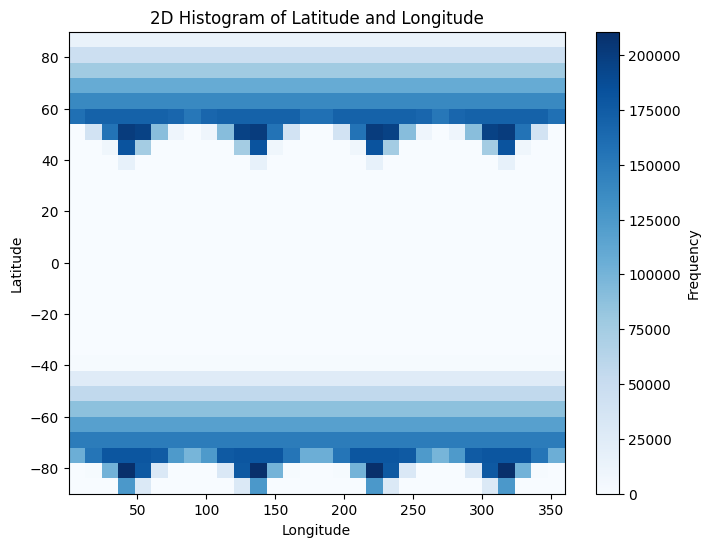

Latitude range: 44.94239044189453 to 90.0
Second latitude: 44.9427490234375
Latitude range: -85.05760955810547 to -40.0
Second latitude: -85.05681610107422
Plotted 19921353 data points


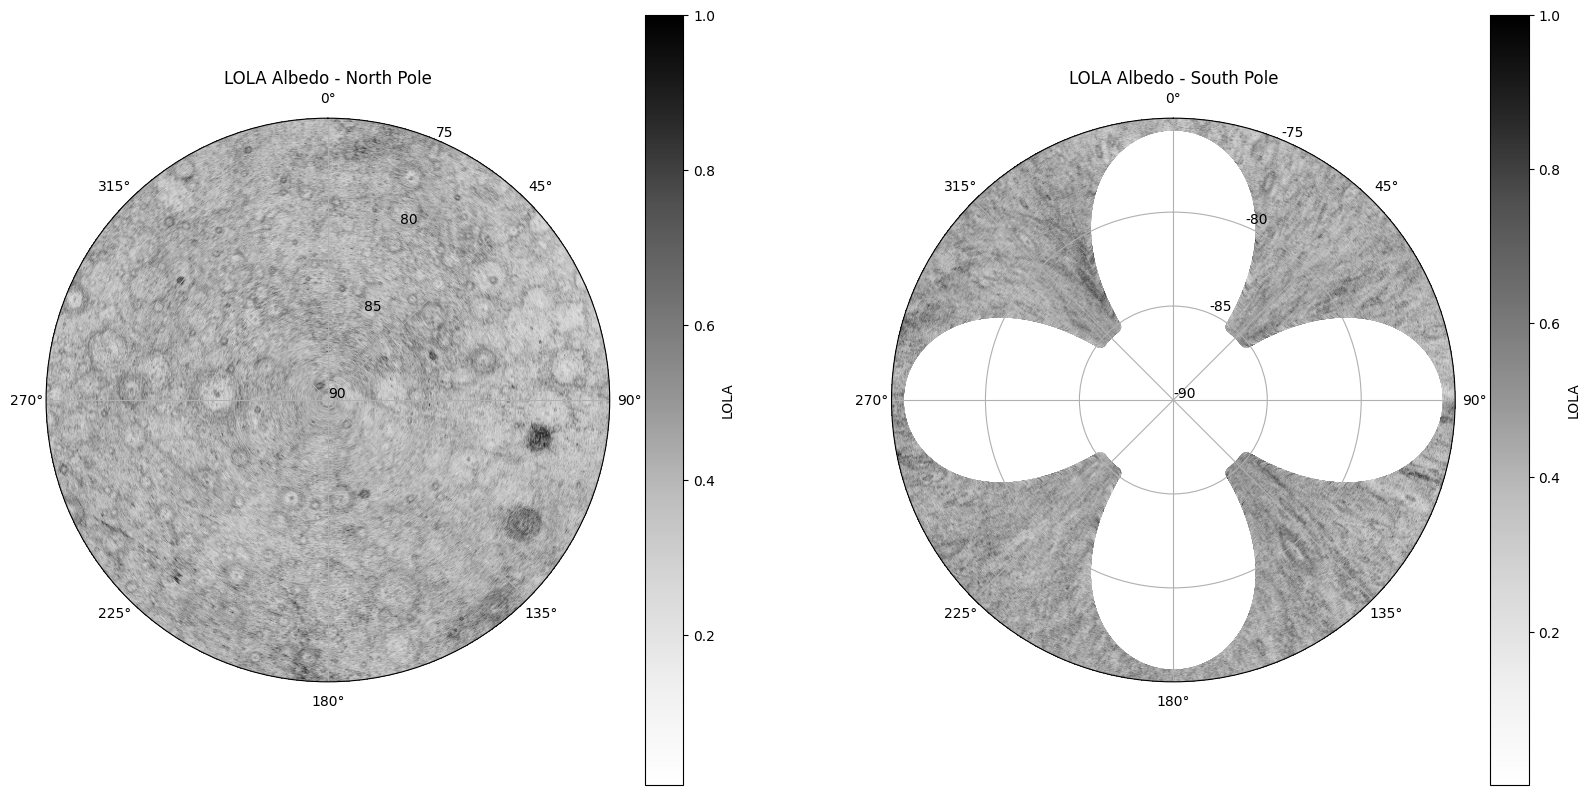

In [3]:
print(f"Number of NaNs in LOLA Albedo data: {np.isnan(LOLA_df["LOLA"]).sum()} out of {np.prod(LOLA_df["LOLA"].shape)} ({(np.isnan(LOLA_df["LOLA"]).sum()/np.prod(LOLA_df["LOLA"].shape)*100):.2f}%)\n")

print(f'Number of lats between -85 and -90: {(LOLA_df["Latitude"] <= -85).sum()} ({(LOLA_df["Latitude"] <= -85).sum()/len(LOLA_df)*100:.2f}%)')

print(LOLA_df.describe())

import matplotlib.pyplot as plt

# 2D Histogram
plt.figure(figsize=(8, 6))

plt.hist2d(LOLA_df['Longitude'], LOLA_df['Latitude'], bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Histogram of Latitude and Longitude')
plt.show()

plot_polar_data(LOLA_df, 'LOLA', frac=None, title_prefix='LOLA Albedo')
